In [1]:
mtcars_k = subset( mtcars, select= c("hp","drat") )

In [3]:
kmeans.result1 = kmeans(mtcars_k, 2)

In [4]:
kmeans.result1

K-means clustering with 2 clusters of sizes 13, 19

Cluster means:
         hp     drat
1 215.69231 3.301538
2  99.47368 3.798421

Clustering vector:
          Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
                  2                   2                   2                   2 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
                  1                   2                   1                   2 
           Merc 230            Merc 280           Merc 280C          Merc 450SE 
                  2                   2                   2                   1 
         Merc 450SL         Merc 450SLC  Cadillac Fleetwood Lincoln Continental 
                  1                   1                   1                   1 
  Chrysler Imperial            Fiat 128         Honda Civic      Toyota Corolla 
                  1                   2                   2                   2 
      Toyota Corona    Dodge Challenger 

In [5]:
table(kmeans.result1$cluster, mtcars$vs)

   
     0  1
  1 13  0
  2  5 14

In [6]:
kmeans.result1$centers

,hp,drat
1,215.69231,3.301538
2,99.47368,3.798421


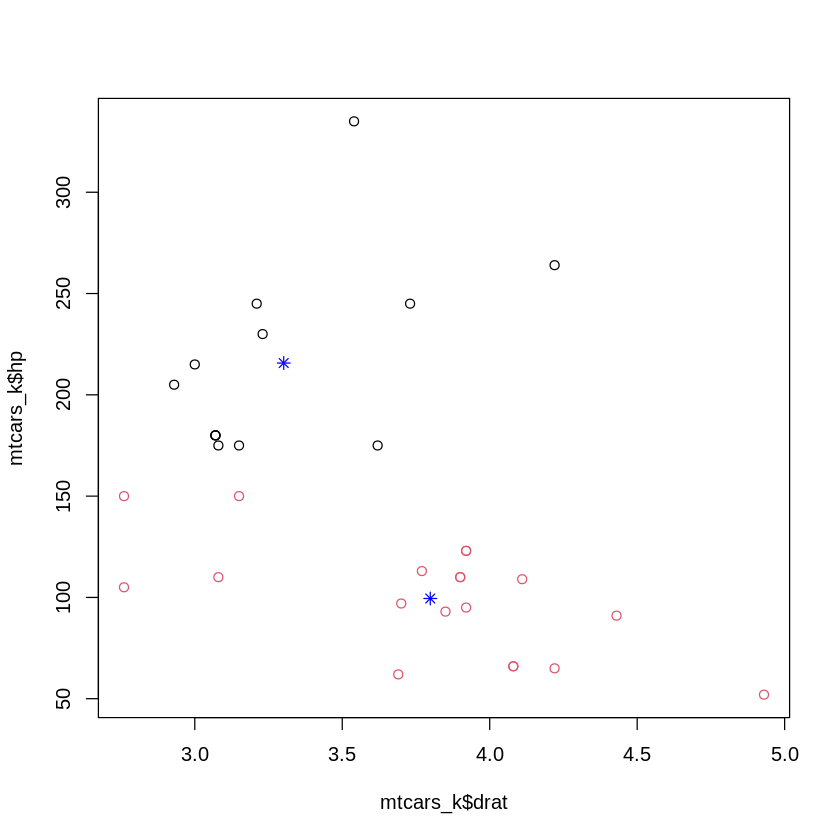

In [17]:
plot(x = mtcars_k$drat, y = mtcars_k$hp, col= kmeans.result1$cluster)
points(x=kmeans.result1$centers[,c("drat")], y=kmeans.result1$centers[,c("hp")], pch = 8, col="blue")

In [18]:
mtcars2 = subset(mtcars , select= c("mpg","qsec"))

In [19]:
hc2 = hclust(dist(mtcars2), method="ave")

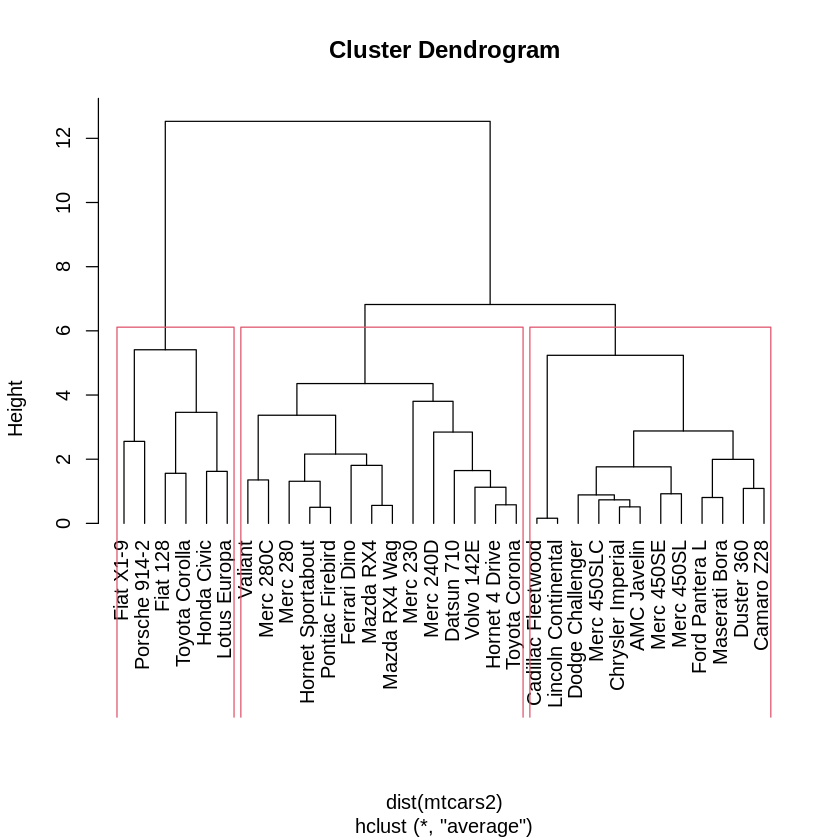

In [22]:
plot(hc2, hang=-1, )
rect.hclust(hc2, k=3)
mtcars$groups = cutree(hc2, k=3)

In [8]:
AdultUCI = read.csv("http://peter.butka.website.tuke.sk/res/AdultUCI_world.csv")

In [9]:
AdultUCI$workclass = as.factor(AdultUCI$workclass)
AdultUCI$education = as.factor(AdultUCI$education)
AdultUCI$marital.status = as.factor(AdultUCI$marital.status)
AdultUCI$occupation = as.factor(AdultUCI$occupation)
AdultUCI$relationship = as.factor(AdultUCI$relationship)
AdultUCI$race = as.factor(AdultUCI$race)
AdultUCI$sex = as.factor(AdultUCI$sex)
AdultUCI$native.country = as.factor(AdultUCI$native.country)
AdultUCI$income = as.factor(AdultUCI$income)


In [11]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:arules’:

    intersect, recode, setdiff, setequal, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [12]:
AdultUCI1 = select_if(AdultUCI, is.factor)

In [4]:
install.packages("arules")
library(arules)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [13]:
table(AdultUCI1$income)


large small 
 7841 24720 

In [14]:
rules1 = apriori(AdultUCI1, parameter=list(minlen=4, supp=0.01, conf=0.68), appearance=list(rhs=c("income=small","income=large")))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.68    0.1    1 none FALSE            TRUE       5    0.01      4
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 488 

set item appearances ...[2 item(s)] done [0.00s].
set transactions ...[101 item(s), 48842 transaction(s)] done [0.03s].
sorting and recoding items ... [53 item(s)] done [0.00s].
creating transaction tree ... done [0.03s].
checking subsets of size 1 2 3 4 5 6 7 8 9 done [0.05s].
writing ... [38 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].


In [15]:
class(rules1)

[1] "rules"
attr(,"package")
[1] "arules"

In [18]:

rules.sorted = sort(rules1, by="lift")
inspect(rules.sorted)

     lhs                                rhs               support confidence   coverage     lift count
[1]  {workclass=Private,                                                                              
      marital.status=Never-married,                                                                   
      occupation=Other-service,                                                                       
      relationship=Own-child,                                                                         
      race=White,                                                                                     
      native.country=United-States}  => {income=small} 0.01214119  0.6919487 0.01754637 1.367158   593
[2]  {workclass=Private,                                                                              
      marital.status=Never-married,                                                                   
      occupation=Other-service,                                          

In [15]:
rules.sorted = rules.sorted[!is.redundant(rules.sorted)]
inspect(rules.sorted)

     lhs                                rhs            support confidence coverage  lift count
[1]  {workclass=Private,                                                                      
      marital.status=Never-married,                                                           
      occupation=Other-service,                                                               
      relationship=Own-child,                                                                 
      race=White}                    => {income=small}   0.013      0.692    0.019 1.367   637
[2]  {workclass=Private,                                                                      
      occupation=Other-service,                                                               
      relationship=Own-child}        => {income=small}   0.016      0.690    0.024 1.364   805
[3]  {workclass=Private,                                                                      
      occupation=Other-service,                   